In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [256]:
# build df

# load log file
file = open('data_2019-05-30_03:38.txt', "r") 
text = file.read() 
file.close()

# split text into matrix
rows = text.split("\n")
header = rows[0].split("\t")
logs =  np.array([row.split("\t") for row in rows[1:]])

logs1 = logs[:2349]
logs2 = logs[2350:]
logs = np.concatenate((logs1,logs2),axis = 0)

logs = np.concatenate(logs, axis=0 )
logs = np.reshape(logs, (-1, 3))

In [259]:
df = pd.DataFrame(logs, columns = header)
df['Case_num'] = df['Case_num'].astype('int64')
df.head()

,Case_num,Status,Details
0,1990224000,Case Was Received,"On March 21, 2019, we received your Form I-765..."
1,1990223990,Validation Error,My Case Status does not recognize the receipt ...
2,1990223980,Case Was Received,"On March 21, 2019, we received your Form I-765..."
3,1990223970,Case Was Received,"On March 21, 2019, we received your Form I-765..."
4,1990223960,Card Was Mailed To Me,"On May 20, 2019, we mailed your new card for y..."


In [260]:
i765_df = df[df['Details'].str.contains('Form I-765')]
i765_df.shape

(3550, 3)

In [261]:
i765_df['Case_num'] = i765_df['Case_num'].astype('int64')
i765_df.describe()

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,Case_num
count,3.550000e+03
mean,1.990201e+09
std,1.382552e+04
min,1.990175e+09
25%,1.990190e+09
50%,1.990202e+09
75%,1.990213e+09
max,1.990224e+09


In [262]:
others_df = df[~df['Details'].str.contains('Form I-765')]
others_df.shape

(1383, 3)

In [263]:
i765_df.groupby('Status').count()

,Case_num,Details
Status,,
Card Was Mailed To Me,404,404
Card Was Returned To USCIS,7,7
Case Rejected Because I Sent An Incorrect Fee,66,66
Case Rejected For Incorrect Fee And Form Not Signed,3,3
Case Was Approved,61,61
Case Was Received,2815,2815
Case Was Rejected Because I Did Not Sign My Form,12,12
Case Was Rejected Because It Was Improperly Filed,15,15
Case Was Transferred And A New Office Has Jurisdiction,1,1


### Insight 1: Only 70% of all YSC cases are Form I-765 (EAD) related

In [264]:
sum(df['Details'].str.contains('Form I-765'))/df.Details.count()

0.7196432191364281

### Insight 2: Of all I-765 cases, 57% are still "Received" and 8% are "Mailed"

In [265]:
print(i765_df[i765_df['Status'] == 'Case Was Received'].Details.count()/df.Details.count())
print(i765_df[i765_df['Status'] == 'Card Was Mailed To Me'].Details.count()/df.Details.count())

0.570646665315224
0.08189742550172309


/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


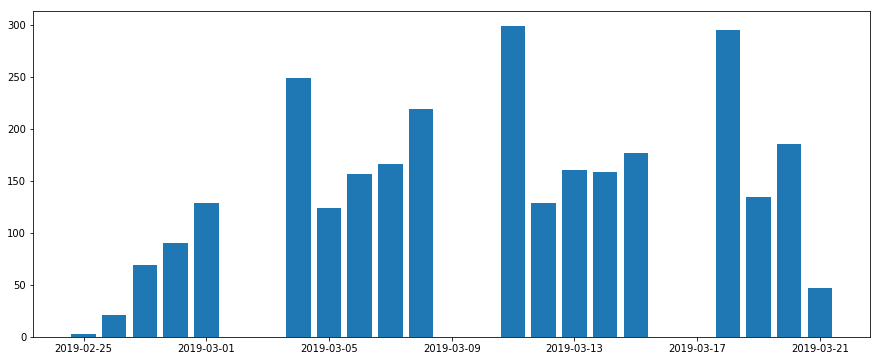

In [267]:
rec_df = i765_df[i765_df['Status'] == 'Case Was Received']

dates = []

for i, row in rec_df.iterrows():
    text = row['Details']
    date = text.split(', we received your')[0][3:]
    date = pd.to_datetime(date).date()
    dates.append(date)
    
rec_df['Dates'] = dates

counts = rec_df.groupby("Dates")['Case_num'].count()
dates_list = list(counts.index.values)
counts_list = list(counts)

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(dates_list, counts_list)
plt.show()

/jet/var/python/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


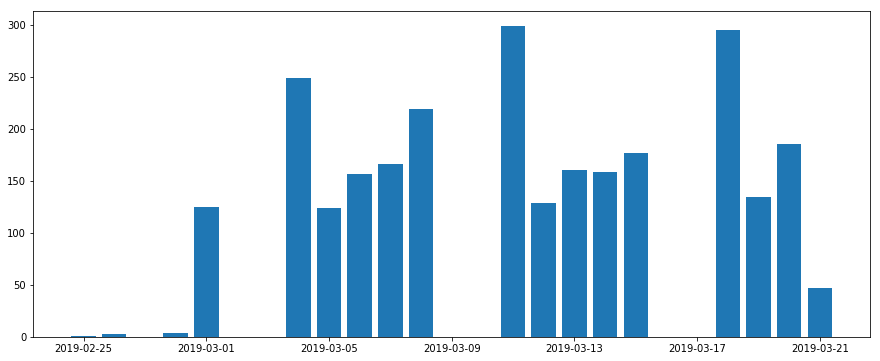

In [269]:
subset_df = i765_df[i765_df['Case_num']>1990180000]

rec_df = subset_df[subset_df['Status'] == 'Case Was Received']

dates = []

for i, row in rec_df.iterrows():
    text = row['Details']
    date = text.split(', we received your')[0][3:]
    date = pd.to_datetime(date).date()
    dates.append(date)
    
rec_df['Dates'] = dates

counts = rec_df.groupby("Dates")['Case_num'].count()
dates_list = list(counts.index.values)
counts_list = list(counts)

fig, ax = plt.subplots(figsize=(15,6))
ax.bar(dates_list, counts_list)
plt.show()

In [227]:
i765_df['Case_num'] = i765_df['Case_num'].astype('int64')
i765_df.describe()

count    3.550000e+03
mean     1.990201e+09
std      1.382552e+04
min      1.990175e+09
25%      1.990190e+09
50%      1.990202e+09
75%      1.990213e+09
max      1.990224e+09
Name: Case_num, dtype: float64

In [ ]:
# get case recieved date

In [ ]:
# get 

In [228]:
1.990190e+09

1990190000.0